In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('ghana_gdp.zip', parse_dates=["year"], index_col = ["year"])
data = data.rename(columns={'GDP (current US$)': 'gdp'})

data.head()

,gdp
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


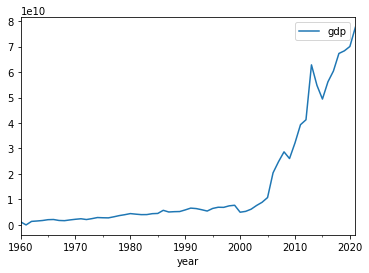

In [2]:
data.plot();

In [3]:
train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 1), (3, 1))

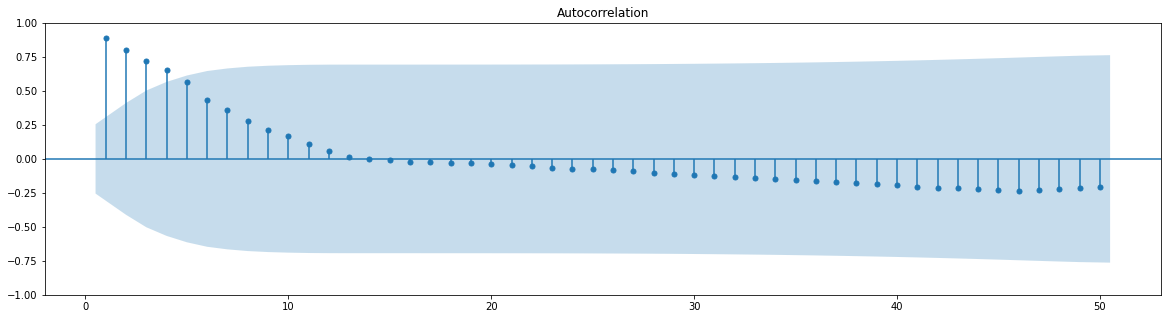

In [4]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.gdp, zero = False, lags=50)
plt.show()

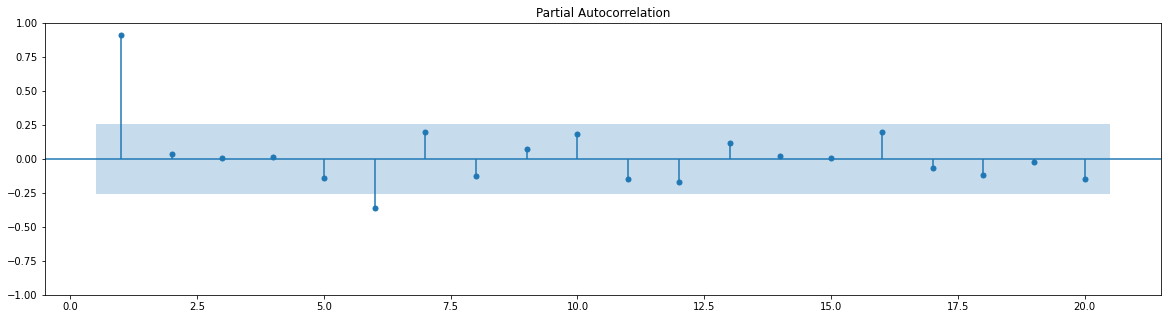

In [5]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.gdp, zero = False, lags = 20)
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(data)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])

adf:  2.3738393561489173
p-value:  0.9989974617734
Critical values:  {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}


In [7]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 50, ax = axes[0])
    sgt.plot_pacf(series, lags = 27, ax = axes[1])
    plt.show()

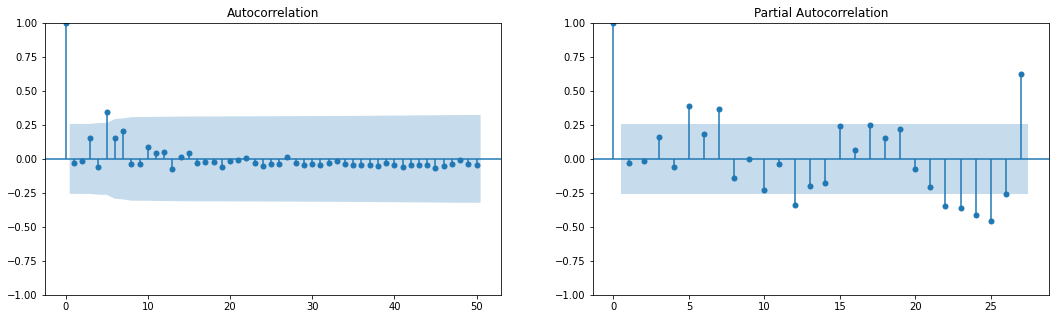

adf:  -1.670248303832082
p-value:  0.44650293297138693
Critical values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


In [8]:
plot_acf_pacf(train_df["gdp"].diff(1).dropna())
test = adfuller(train_df["gdp"].diff(1).dropna())
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])

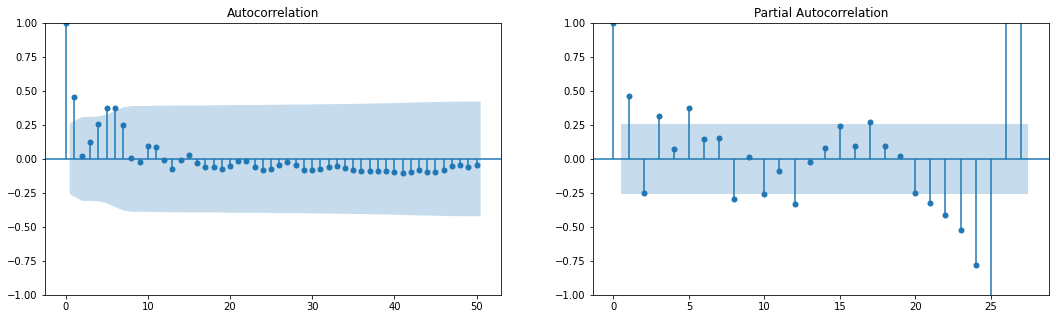

adf:  -3.5836708658260323
p-value:  0.006080989753876896
Critical values:  {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}


In [9]:
plot_acf_pacf(train_df["gdp"].diff(2).dropna())
test = adfuller(train_df["gdp"].diff(2).dropna())
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])

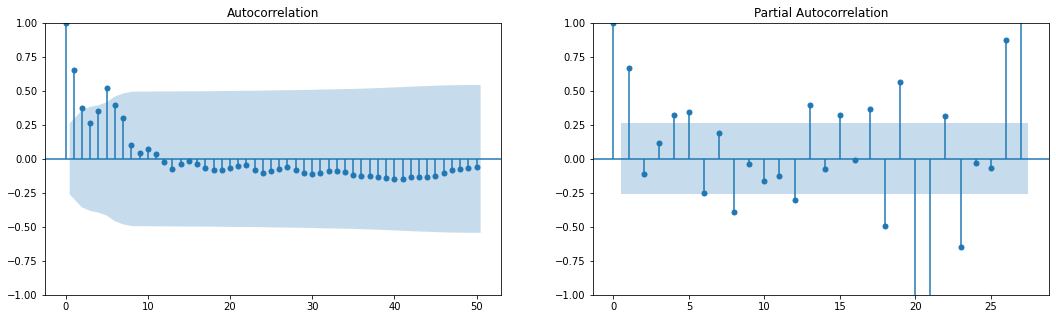

adf:  -3.0788074707524755
p-value:  0.02816180382033294
Critical values:  {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


In [11]:
plot_acf_pacf(train_df["gdp"].diff(3).dropna())
test = adfuller(train_df["gdp"].diff(3).dropna())
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])